#**SIMPLE , MULTIPLE LINEAR REGRESSION & POLYNOMIAL REGRESSION:**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

# Load the datasets from your Google Drive or upload directly in Colab
startups_dataset = pd.read_csv('50_Startups.csv')
salaries_dataset = pd.read_csv('Position_Salaries.csv')

# Display the first few rows of each dataset
print("50_Startups Dataset:")
print(startups_dataset.head())
print("\nPosition_Salaries Dataset:")
print(salaries_dataset.head())


50_Startups Dataset:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Position_Salaries Dataset:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [ ]:
# 1. Encoding categorical data in the 50_Startups.csv dataset

# Using LabelEncoder and OneHotEncoder to handle the 'State' column
label_encoder = LabelEncoder()
startups_dataset['State'] = label_encoder.fit_transform(startups_dataset['State'])
# Creating the matrix of features (independent variables) and the dependent variable
X_startups = startups_dataset.iloc[:, :-1].values
y_startups = startups_dataset.iloc[:, -1].values
# Apply OneHotEncoder to the 'State' column (index 3 after label encoding)
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder='passthrough')
X_startups = ct.fit_transform(X_startups)
# Avoiding the Dummy Variable Trap by removing one dummy variable
X_startups = X_startups[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_startups, y_startups, test_size=0.2, random_state=0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Comparing the predictions with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual      Predicted
0  103282.38  103015.201598
1  144259.40  132582.277608
2  146121.95  132447.738452
3   77798.83   71976.098513
4  191050.39  178537.482211
5  105008.31  116161.242302
6   81229.06   67851.692097
7   97483.56   98791.733747
8  110352.25  113969.435330
9  166187.94  167921.065696


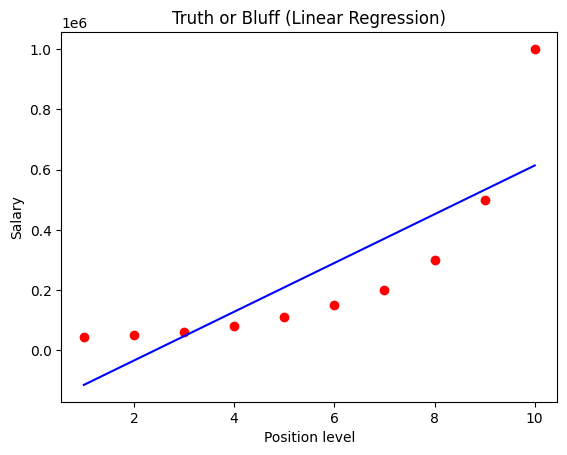

In [ ]:
# Visualising the Simple Linear Regression results
plt.scatter(X_salaries, y_salaries, color='red')
plt.plot(X_salaries, lin_reg.predict(X_salaries), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

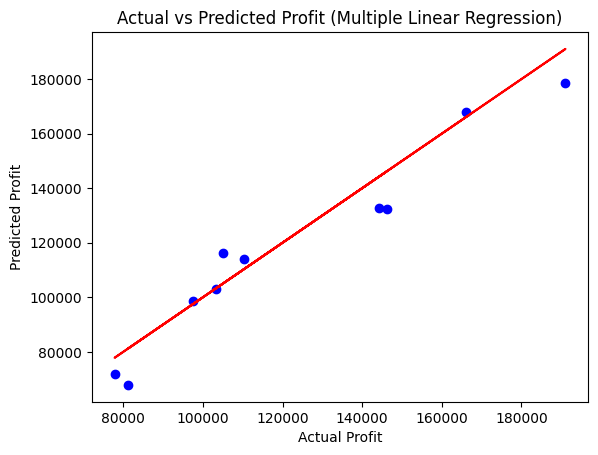

In [ ]:
# Visualizing the results of Multiple Linear Regression
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Profit (Multiple Linear Regression)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

In [ ]:
# 2. Polynomial Linear Regression on Position_Salaries.csv

# Preparing the data
X_salaries = salaries_dataset.iloc[:, 1:2].values
y_salaries = salaries_dataset.iloc[:, 2].values

# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X_salaries, y_salaries)


LinearRegression()

In [ ]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_salaries)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_salaries)


LinearRegression()

<ipython-input-22-ae2143e83a3c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_salaries), max(X_salaries), 0.1) # For smoother curve


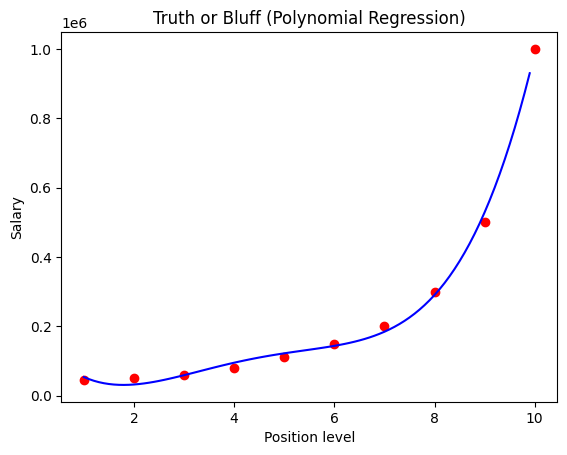

In [ ]:
# Visualising the Polynomial Regression results
X_grid = np.arange(min(X_salaries), max(X_salaries), 0.1) # For smoother curve
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_salaries, y_salaries, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Conclusion:**

 In Part A, we applied both Simple and Multiple Linear Regression on the 50_Startups.csv dataset, as well as Polynomial Linear Regression on the Position_Salaries.csv dataset. By visualizing the training and testing set results, encoding categorical data, and analyzing the regression outputs, we effectively identified key predictors and trends within the data. The use of Polynomial Regression allowed us to capture more complex relationships, enhancing the model’s accuracy.